In [1]:
def total(list_obj):
    total = 0
    for val in list_obj:
        total += val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    # sort the values and take the middle value if the 
    #    list is of odd length
    # or the mean of the two middle values if the list 
    #    of even length 
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        # list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(
            list_obj[lower_middle_index:upper_middle_index])
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
lst = [4,5,6,7,8,9,4]

print("total:", total(lst))
print("mean:", mean(lst))
print("median:", median(lst))
print("mode:", mode(lst))
print("variance:", variance(lst, sample = False))
print("variance (sample):", variance(lst, sample = True))
print("SD:", SD(lst, sample = False))
print("SD: (sample):", SD(lst, sample = True))

lst2 = [5,23,7,5,3,2,1]
print("Covariance:", covariance(lst, lst2, sample = False))
print("Covariance (sample):", covariance(lst, lst2, sample = True))
print("Correlation:", correlation(lst, lst2))
print("Skewness:", skewness(lst, sample = False))
print("Skewness (sample):", skewness(lst, sample = True))
print("Kurtosis:", kurtosis(lst, sample = False))
print("Kurtosis (sample):", kurtosis(lst, sample = True))

total: 43
mean: 6.142857142857143
median: 6
mode: [4]
variance: 3.265306122448979
variance (sample): 3.809523809523809
SD: 1.8070158058105024
SD: (sample): 1.9518001458970662
Covariance: -3.510204081632653
Covariance (sample): -4.095238095238095
Correlation: -0.2788447874269649
Skewness: 0.22234764798058862
Skewness (sample): 0.288195490292613
Kurtosis: 1.6473437499999997
Kurtosis (sample): -1.4463750000000002


## Create a function that generates a datastructure with statistics for each column of data
We will use this function after downloading data using pandas_datareader.

In [5]:
import pandas as pd
def gather_statistics(df, sample = True):
    # create a dictionary of dictionaries with an 
    #  entry for each column of data in a dataframe, df
    dct = {key:{} for key in df}
    # call each column of data and its name (key)
    # df.items() makes a list of tuples where
    #  tuple index 0 refers to the key, 
    #   index 1 refers to object pointed to by key   
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis=0, inplace =True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

In [4]:

!pip install pandas-datareader

In [6]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-10 23:54:35.235733



## Download data for each stock
Includes High, Low, Open, Close, Volume, and Adj Close Values

In [7]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [8]:

print(key +" Closing Price")
data_dict[key]

TSLA Closing Price


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-10-04,806.969971,776.119995,796.500000,781.530029,30483300.0,781.530029
2021-10-05,797.309998,774.200012,784.799988,780.590027,18432600.0,780.590027
2021-10-06,786.659973,773.219971,776.200012,782.750000,14632800.0,782.750000


In [9]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [10]:

data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-10-04  287.750000  280.250000  287.399994  283.109985  31350700.0   
2021-10-05  290.399994  284.049988  284.049988  288.760010  24993000.0   
2021-10-06  293.630005  285.510010  285.779999  293.109985  28002600.0   
2021-10-07  296.640015  293.920013  295.179993  294.850006  20430500.0   
2021-10-08  296.640015  293.760010  296.220001  294.850006  17680300.0   

             Adj Close  

In [11]:
for df in data_dict.values():
    print(df["Close"])

Date
2012-01-03     26.770000
2012-01-04     27.400000
2012-01-05     27.680000
2012-01-06     28.110001
2012-01-09     27.740000
                 ...    
2021-10-04    283.109985
2021-10-05    288.760010
2021-10-06    293.109985
2021-10-07    294.850006
2021-10-08    294.850006
Name: Close, Length: 2459, dtype: float64
Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-10-04    139.139999
2021-10-05    141.110001
2021-10-06    142.000000
2021-10-07    143.289993
2021-10-08    142.899994
Name: Close, Length: 2459, dtype: float64
Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2021-10-04    326.230011
2021-10-05    332.959991
2021-10-06    333.640015
2021-10-07    329.220001
2021-10-08    330.049988
Name: Close, Length: 2364, dtype: float64
Date
2012-01-03      5.616000
2012

In [12]:
close_data = pd.concat((df["Close"] for df in data_dict.values()), 
                       keys = data_dict.keys(),
                        axis = 1) # concatenate columns horizontally
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-10-04,283.109985,139.139999,326.230011,781.530029
2021-10-05,288.760010,141.110001,332.959991,780.590027
2021-10-06,293.109985,142.000000,333.640015,782.750000


Text(0.5, 1.0, 'Daily Stock Prices')

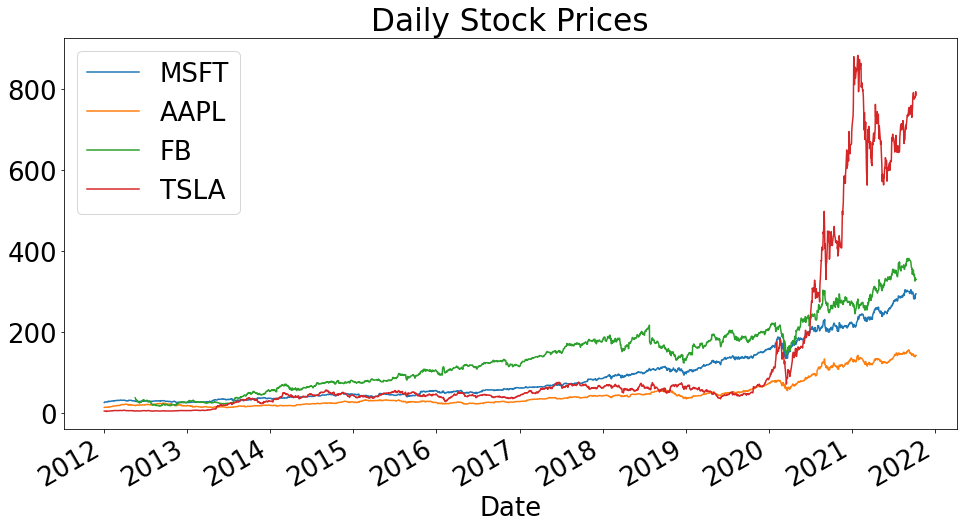

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (16,8))
close_data.plot.line(ax = ax, legend = True)
# plt.title("Close\nDaily Stock Prices")
ax.set_title("Daily Stock Prices")

<ipython-input-15-d73e4333f735>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

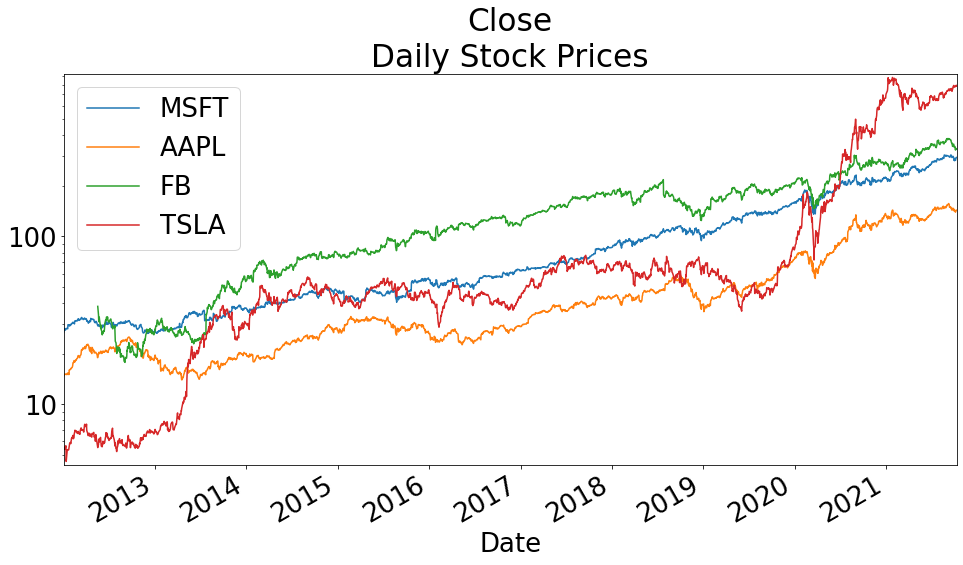

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01  
    
fig, ax = plt.subplots(figsize = (16,8))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices")
ax.set_yscale("log")
# reset y-ticklabels so that they are not in 
# scientific notation
y_vals = ax.get_yticks()
# transform values to integers, set as new ytick values
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [16]:
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537408,NaN,-1.317670
2012-01-05,1.021900,1.110200,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2021-10-04,-2.071955,-2.460564,-4.891985,0.813970
2021-10-05,1.995699,1.415841,2.062956,-0.120277
2021-10-06,1.506433,0.630713,0.204236,0.276710


<ipython-input-17-f80ffaf26133>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


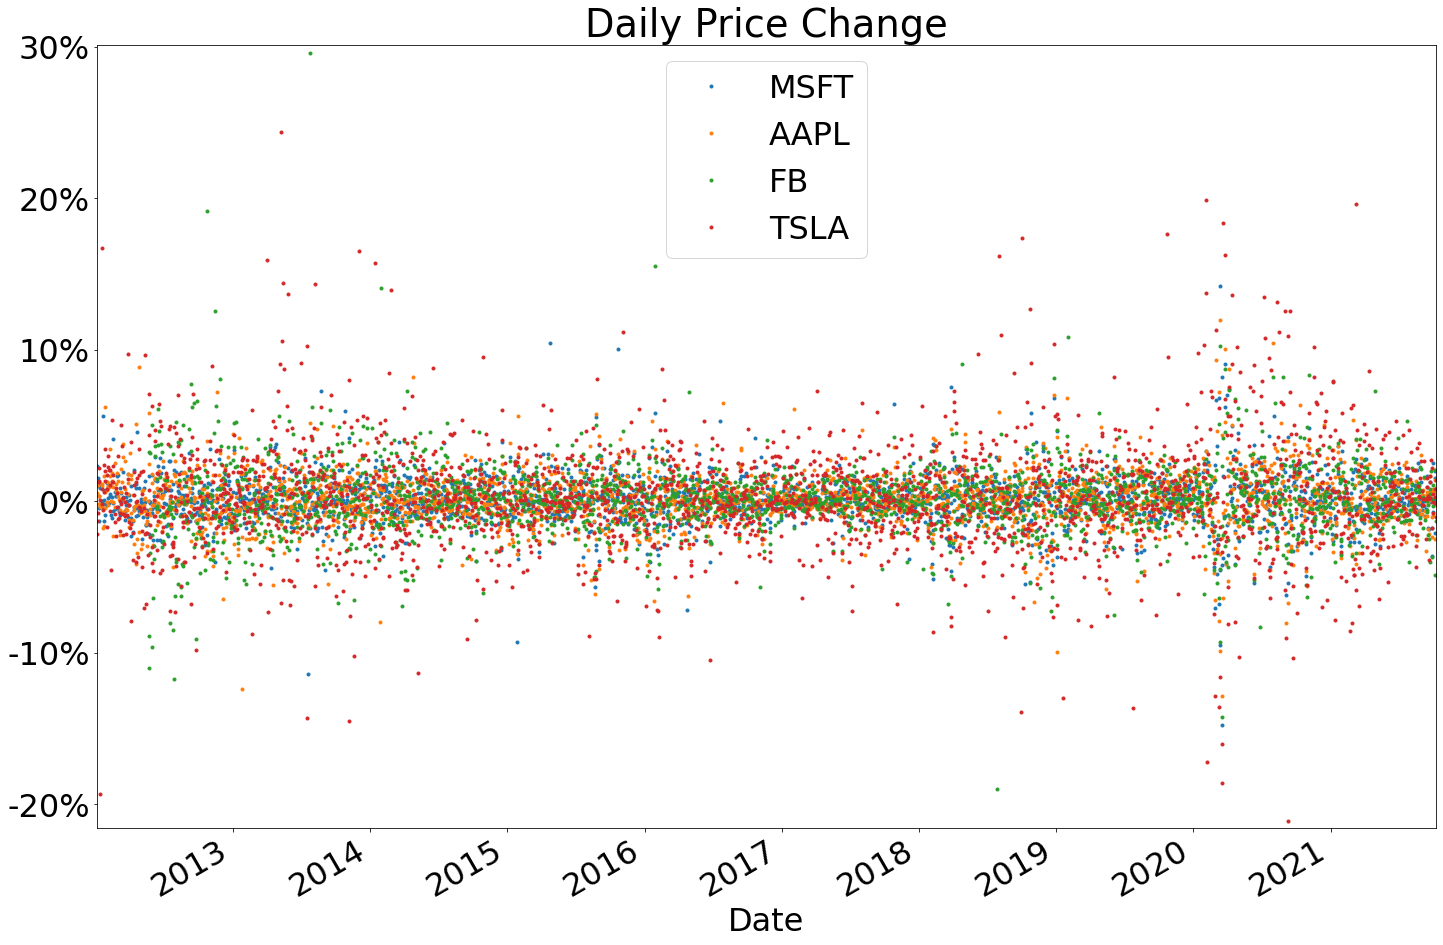

In [17]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = "", marker = ".",
                                    ax = ax, legend = True)    
plt.title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])   
plt.show()
plt.close()

In [18]:
stats_df = gather_statistics(price_change_data, 
                             sample = True)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.111,0.109,0.118,0.262
median,0.069,0.081,0.105,0.131
variance,2.597,3.215,5.375,12.234
S.D.,1.611,1.793,2.318,3.498
skewness,0.044,-0.120,0.940,0.433
kurtosis,10.729,6.444,18.549,6.270


<ipython-input-19-fa4c90caafb1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


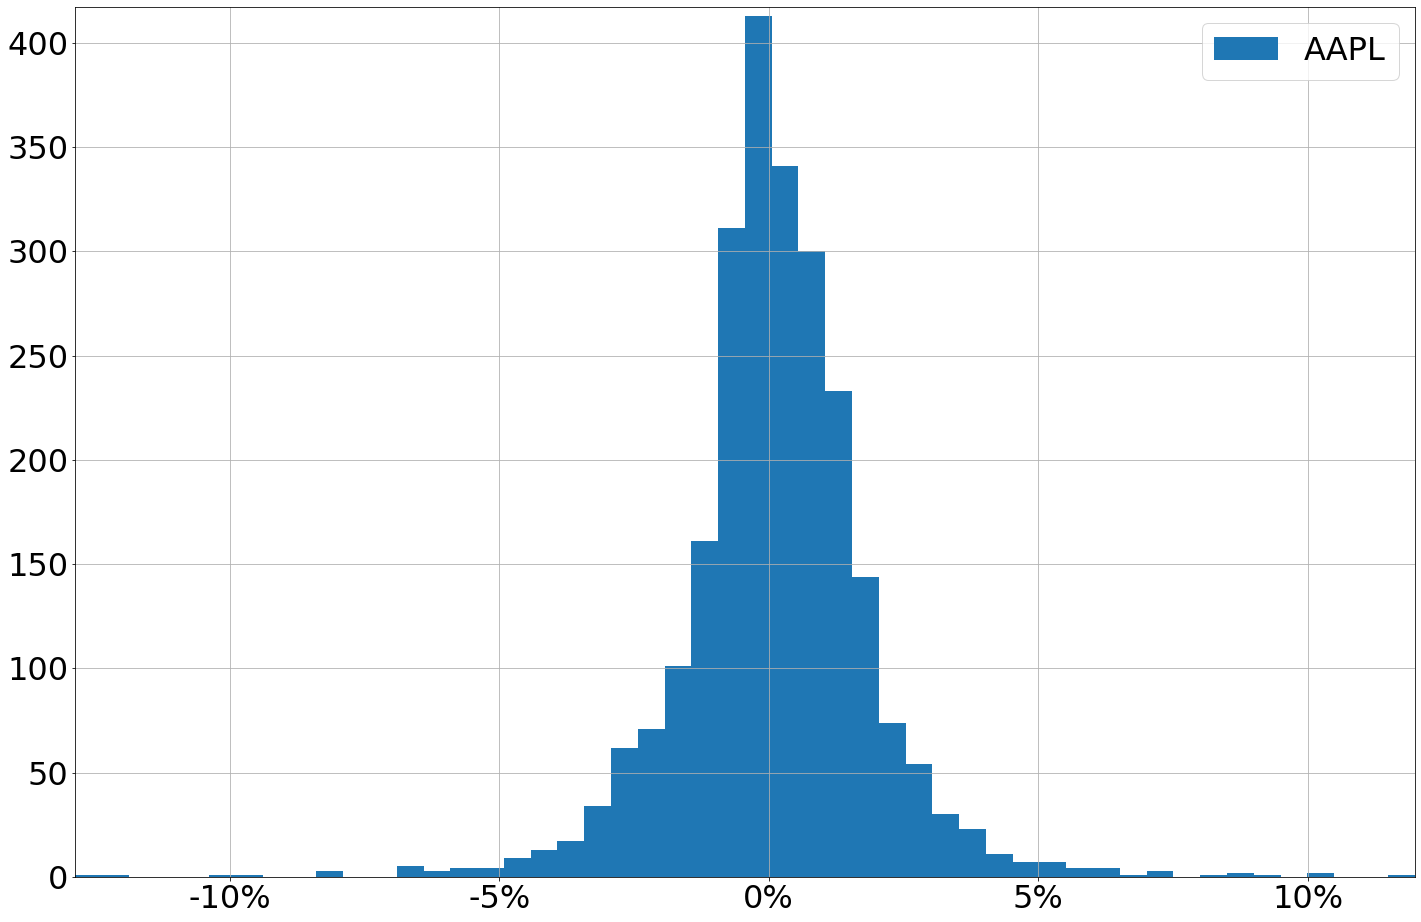

In [19]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()
plt.show()

<ipython-input-20-1c3ea62be6aa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-20-1c3ea62be6aa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


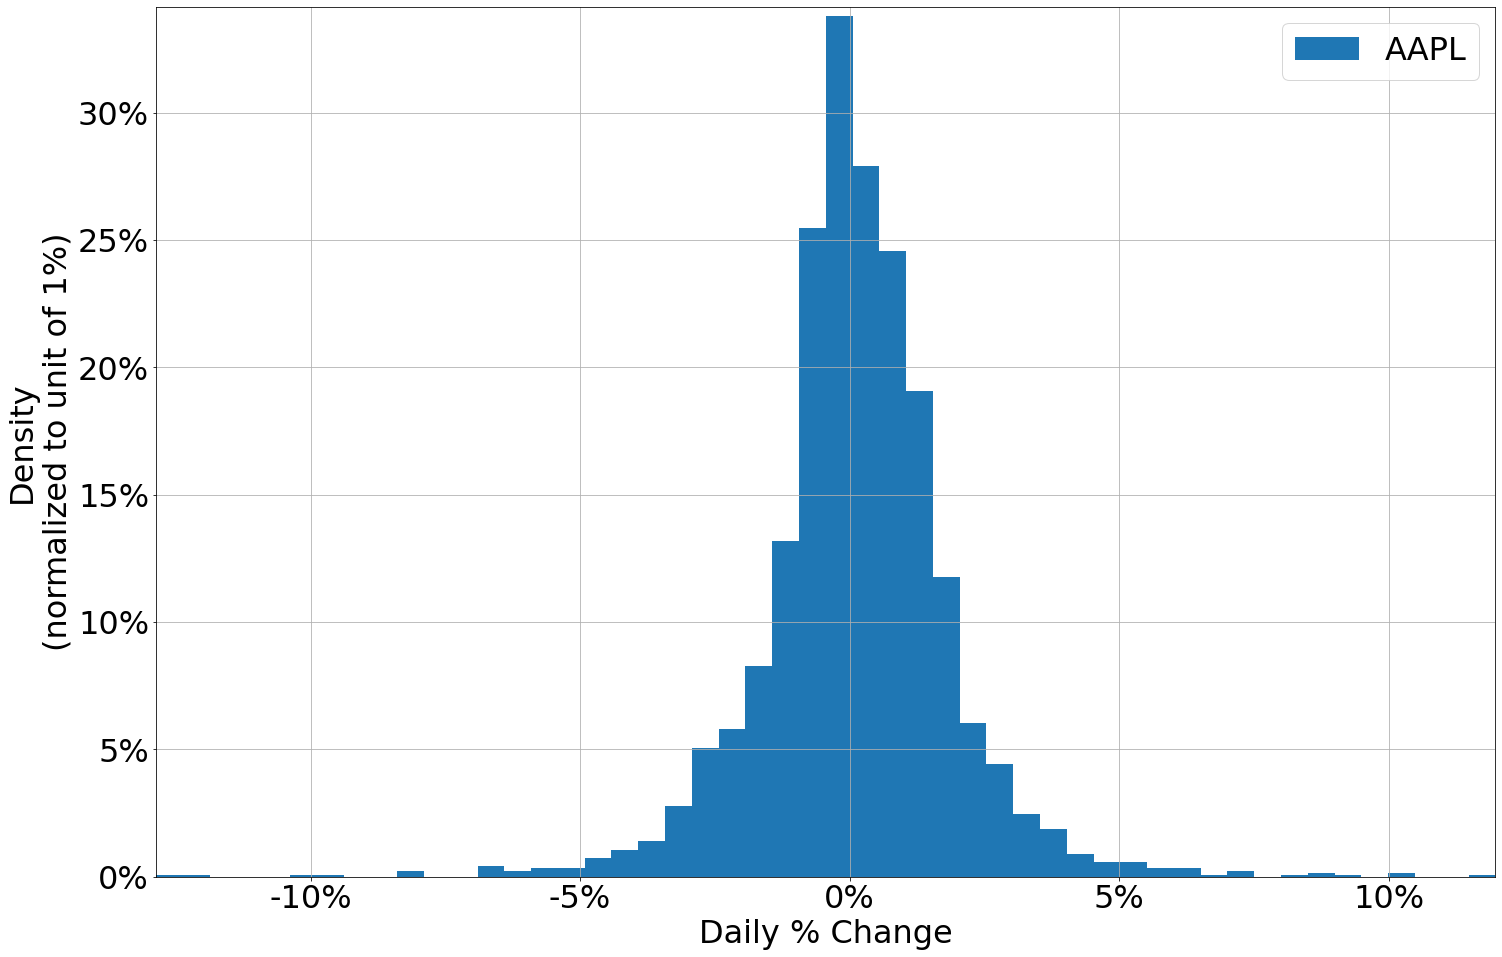

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, 
                               density = True,
                               label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Daily % Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
ax.set_ylabel("Density\n(normalized to unit of 1%)")
plt.legend()
plt.show()

array([<AxesSubplot:title={'center':'MSFT'}>,
       <AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>], dtype=object)

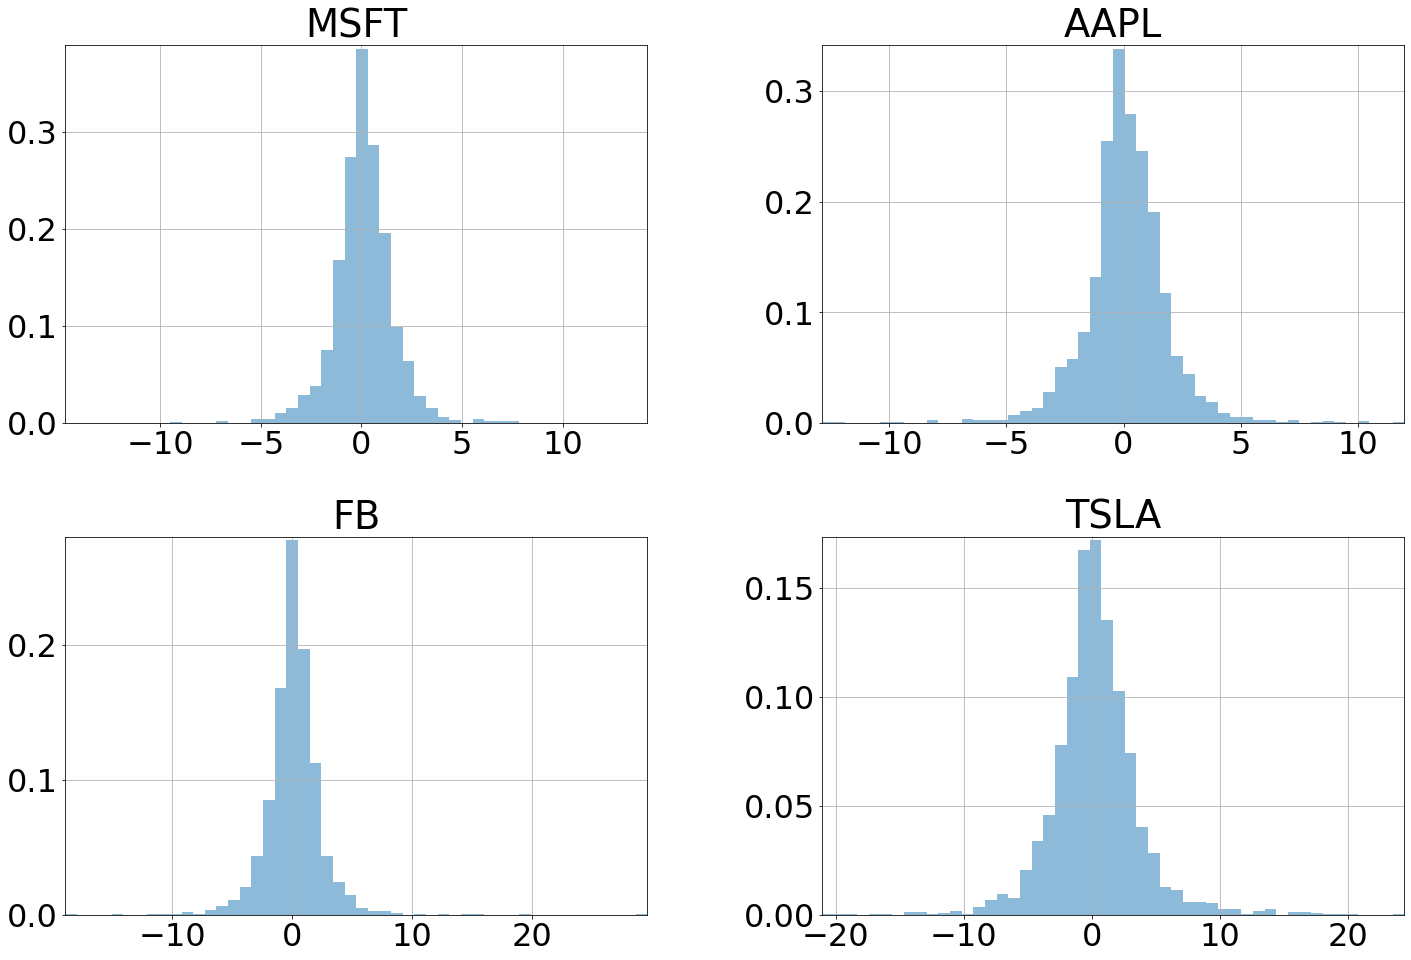

In [21]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

<ipython-input-22-ce445de87fa1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-22-ce445de87fa1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


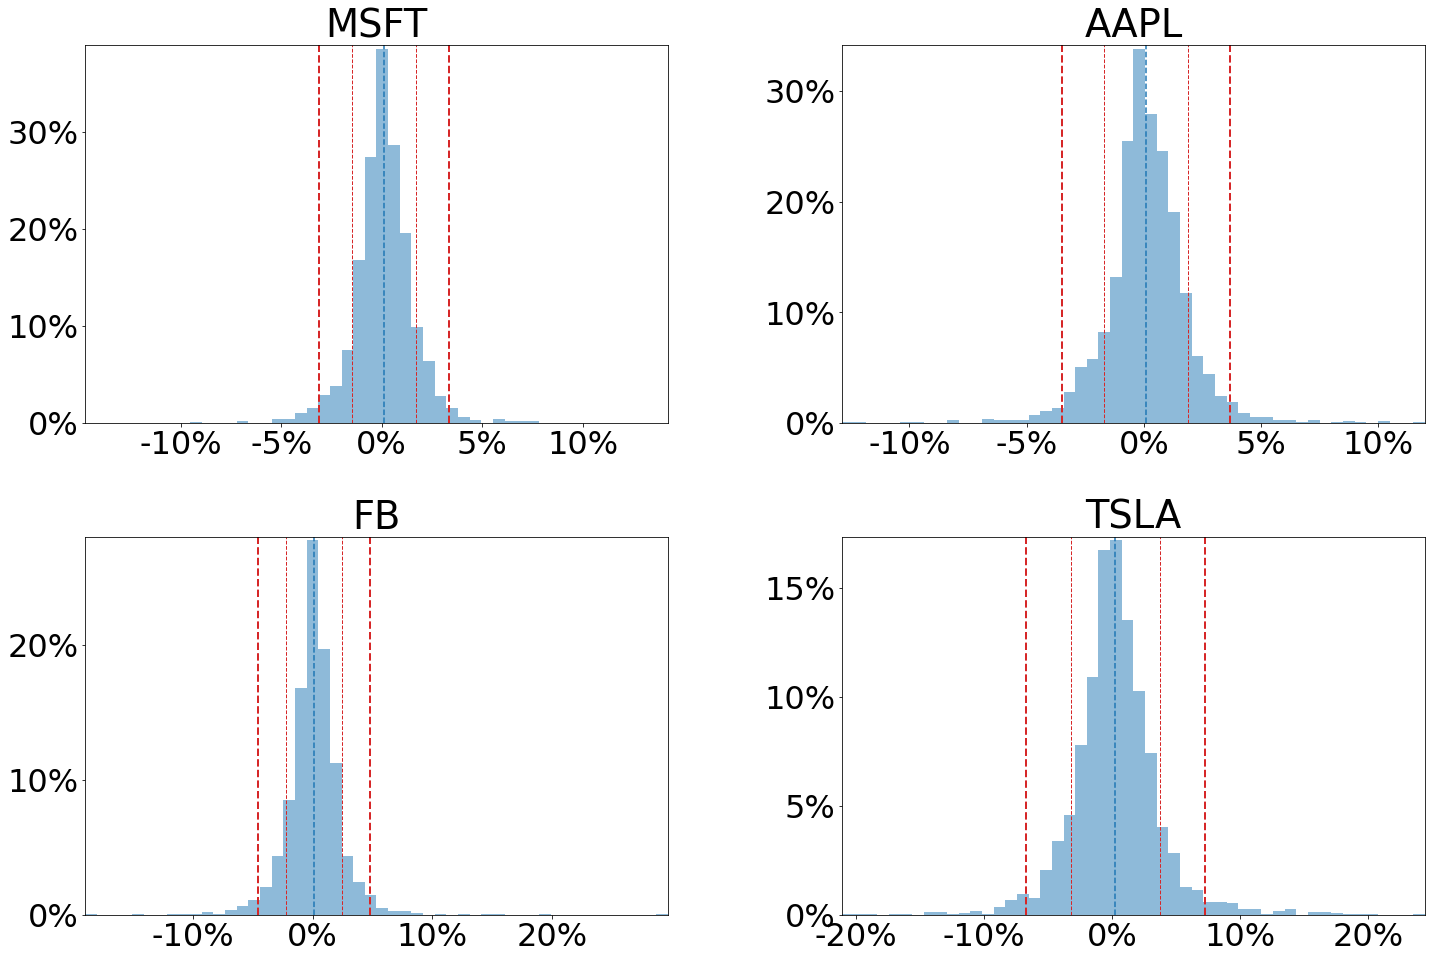

In [22]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax[i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")
        num_SDs = 2
        for num in range(1,num_SDs+1):
            a.axvline(x = hist_data.loc["mean"]+hist_data.loc["S.D."] *num ,
                      color = "C3",
                      ls="--",
                     lw = num)
            a.axvline(x = hist_data.loc["mean"]-hist_data.loc["S.D."] *num, 
                      ls="--",
                     color = "C3",
                     lw = num)

<ipython-input-23-d65355694a27>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-23-d65355694a27>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


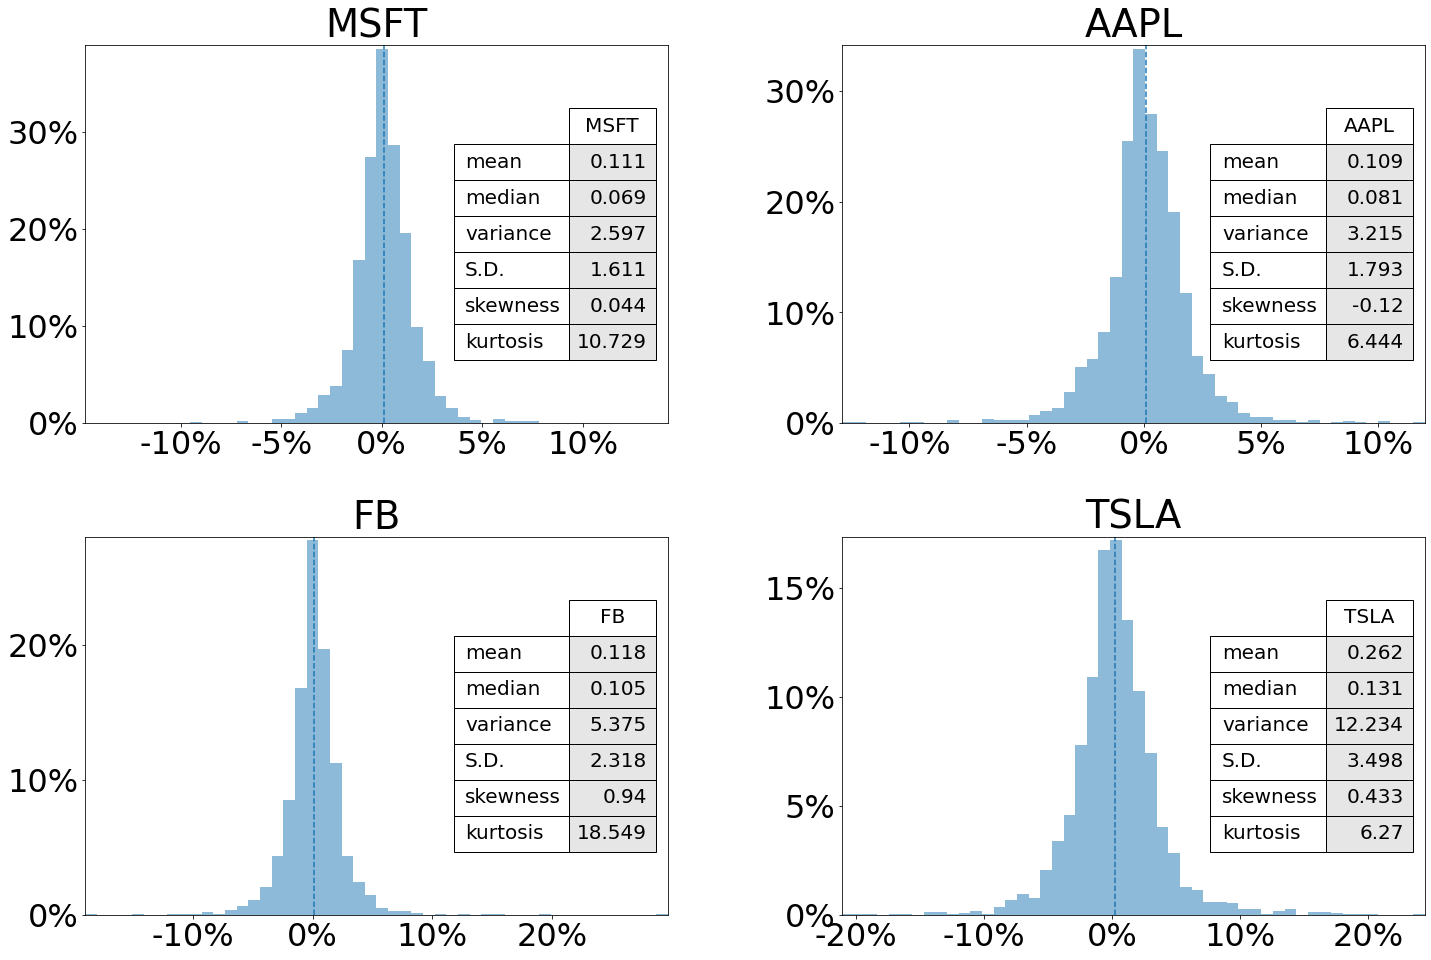

In [23]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax[i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")

        
        stats_table = table(a, 
                      hist_data,
                     colWidths=[.1],
                     cellColours=[[(.9,.9,.9)]]*6,
                     loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)

<ipython-input-24-586848f3b57d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-24-586848f3b57d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


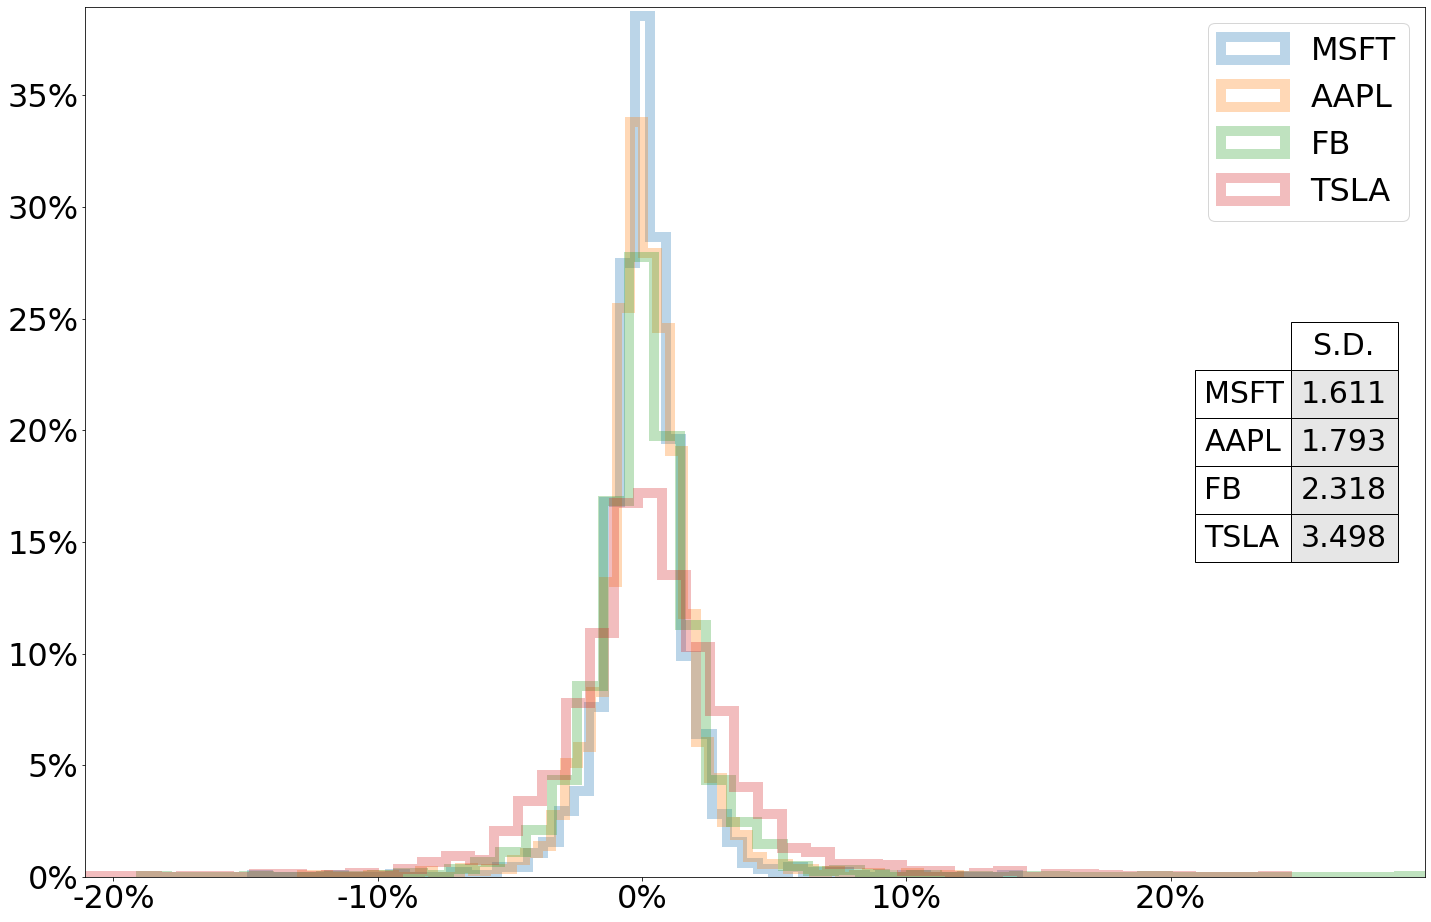

In [24]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

<ipython-input-25-4d9cd2a2fa24>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-25-4d9cd2a2fa24>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


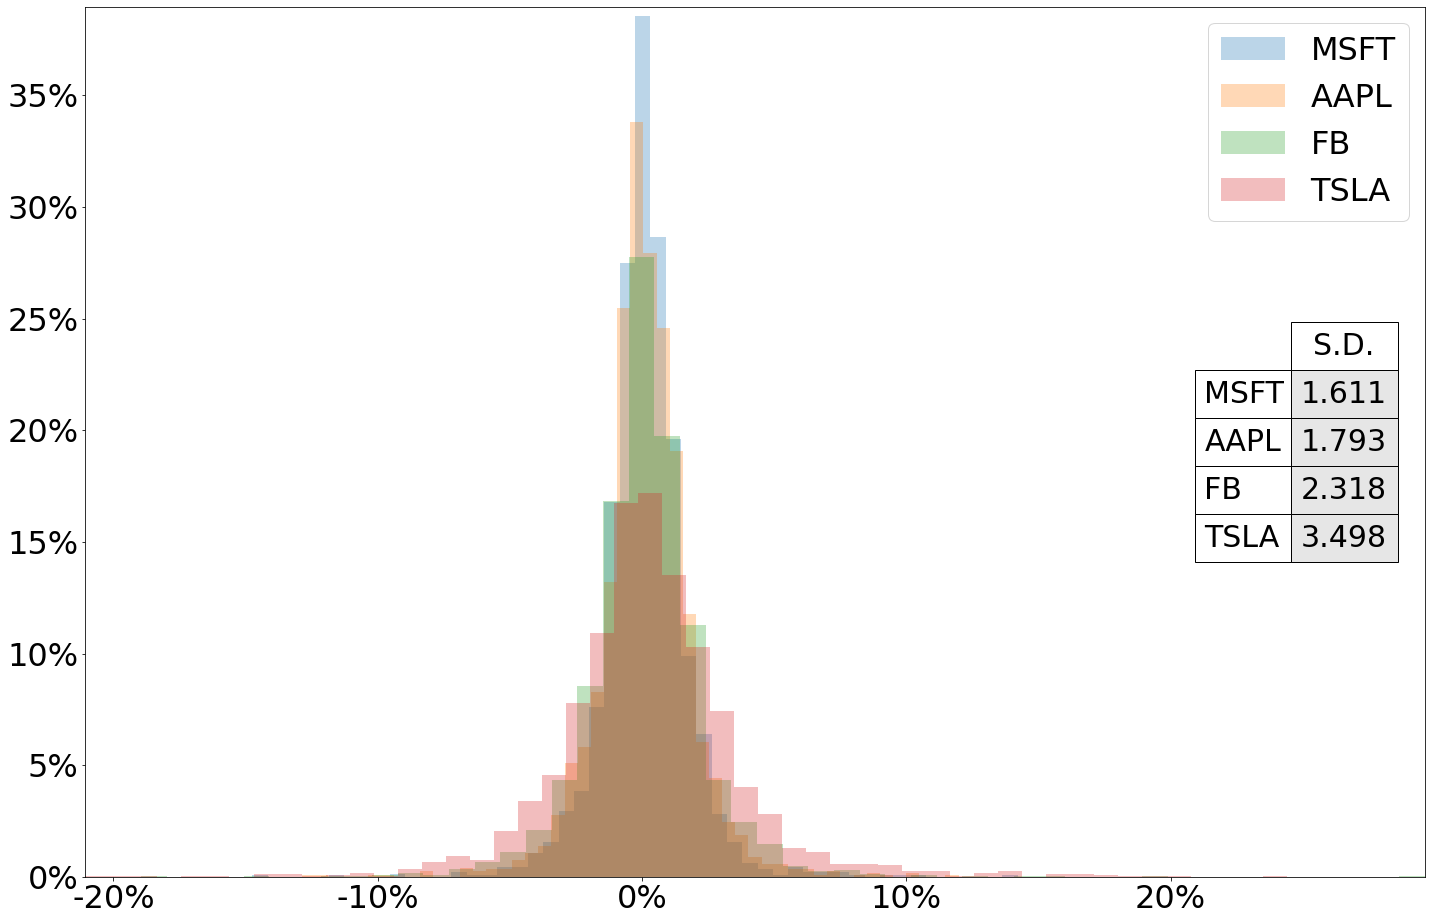

In [25]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()